In [45]:
import pickle
import numpy as np
import lzma
import scipy.signal
import tensortools as tt
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import scipy.signal
import matplotlib.cm as cm

In [3]:
paramlist = []
counter = 0
for networktype in ['FeedForward', 'ScaleFree', 'SmallWorld']:
    for cellcount in [30, 50, 60]:
        for modelid in range(10):
                for inputid in range(10):
                    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
                        MeanDelay = np.round(MeanDelay_noround,1)
                        for stdDelay_noround in np.arange(0, 1.01, 0.05):
                            stdDelay = np.round(stdDelay_noround,2)
                            param = {'NetworkType': networktype, 'n': cellcount, 'model_id': modelid, 'input_idx': inputid, 'MeanDelay': MeanDelay, 'stdDelay': stdDelay, 'counter': counter}
                            paramlist.append(param)
                            counter += 1

In [4]:
len(paramlist)

113400

In [5]:
paramlist[3*12600 + 1]

{'NetworkType': 'ScaleFree',
 'n': 30,
 'model_id': 0,
 'input_idx': 0,
 'MeanDelay': 2.0,
 'stdDelay': 0.05,
 'counter': 37801}

In [30]:
def reloadfile_spectral(paramdict):
    NetworkType, cellcount, model_id, input_idx, meandelay, stddelay = paramdict['NetworkType'], paramdict['n'], paramdict['model_id'], paramdict['input_idx'], paramdict['MeanDelay'], paramdict['stdDelay']
    filename = f'./SpectralProcessing/{NetworkType}_cellcount{cellcount}_meandelay{meandelay}_stddelay{stddelay}_modelid{model_id}_inputid{input_idx}_spectral.pkl'
    with open(filename, 'rb') as f: 
        output = pickle.load(f)
    return output

spectral_data = reloadfile_spectral(paramlist[125])

In [17]:
len(spectral_data[0])

300

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 3
20 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
10 4
11 4
12 4
13 4
14 4
15 4
16 4
17 4
18 4
19 4
20 4
0 5


IndexError: index 5 is out of bounds for axis 1 with size 5

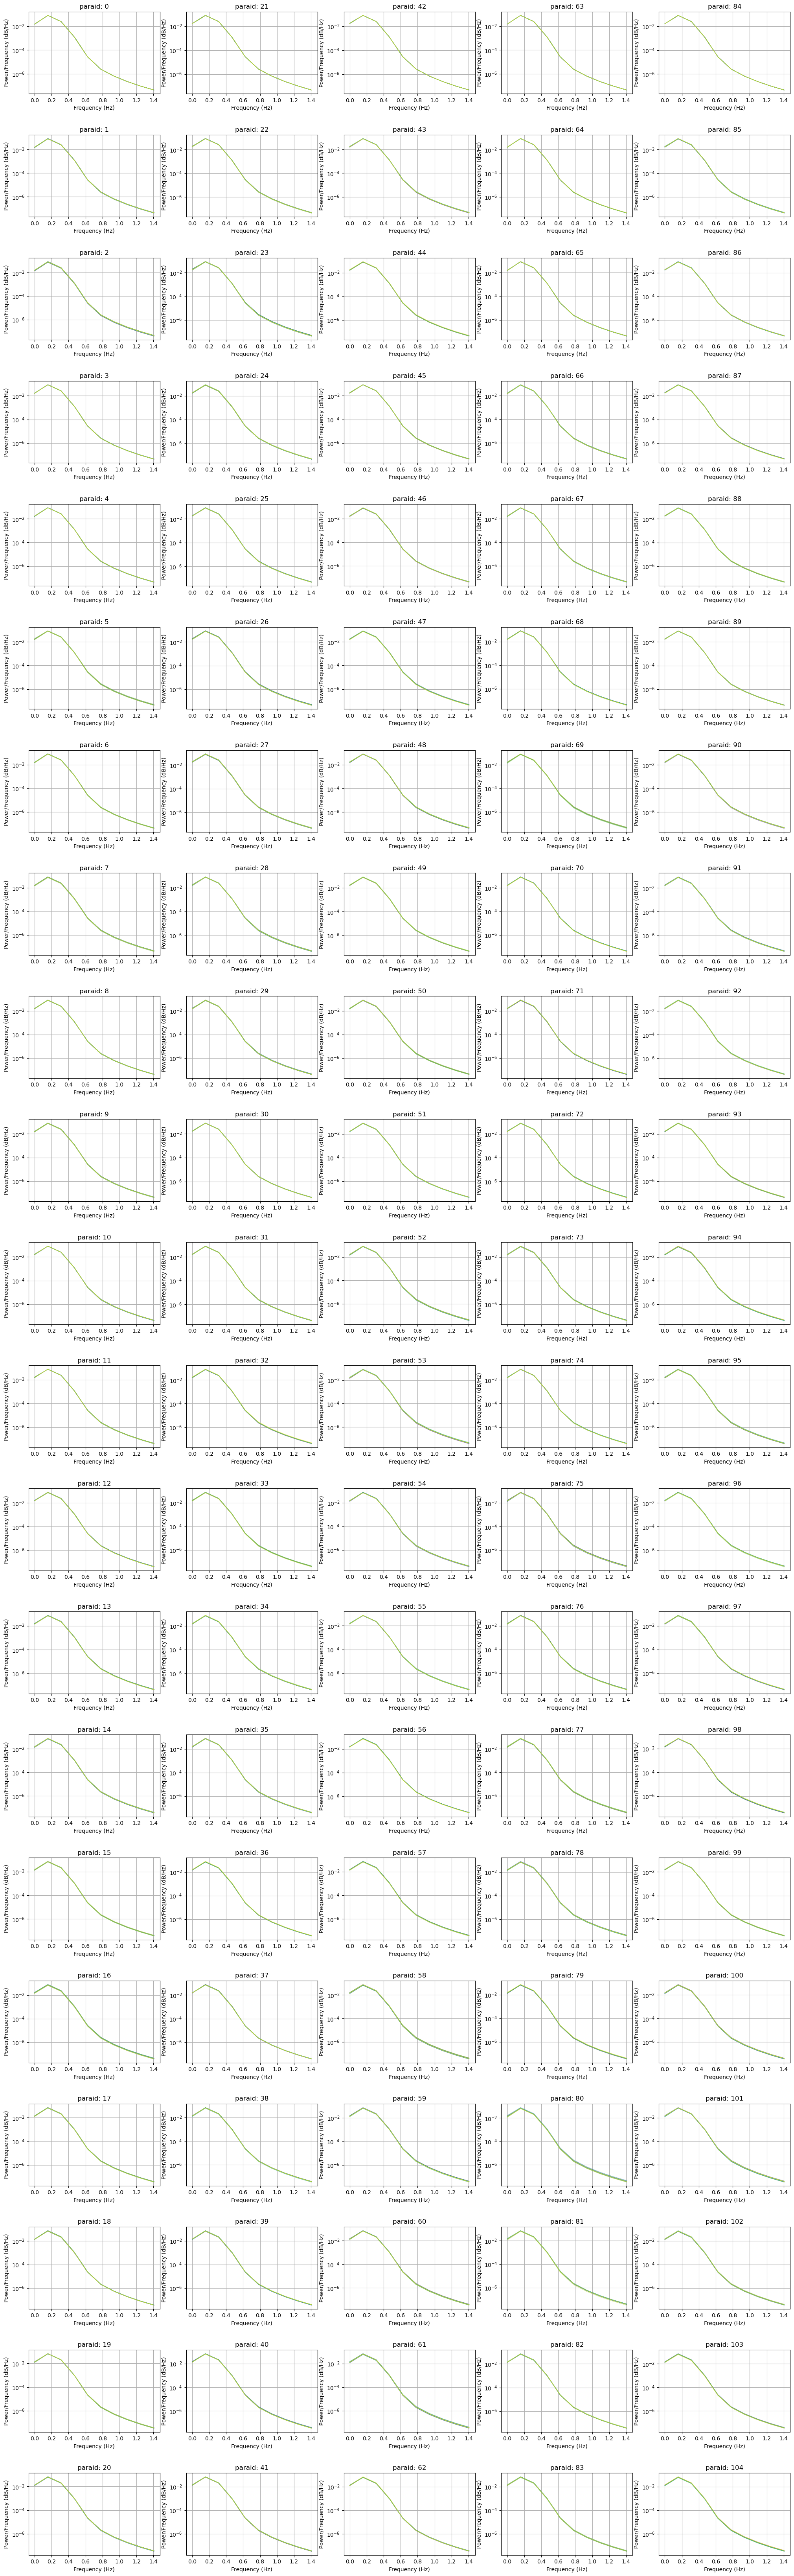

In [53]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming reloadfile_spectral and paramlist are defined as before

cellcode = 150
cutoff = 10
nruns = 10  # Assuming there are 10 runs in each spectral_data
colors = cm.viridis(np.linspace(0, 1, nruns))

# Create a 21x5 grid of subplots
fig, axes = plt.subplots(21, 5, figsize=(25, 84))  # Adjust the figsize as needed
fig.subplots_adjust(hspace=0.5)

# Iterate over each subplot and paraid
for index in range(124):  # Assuming we have 126 paraids, from 0 to 125
    paraid = index
    spectral_data = reloadfile_spectral(paramlist[paraid])

    # Calculate the position of the subplot
    col = index // 21  # Integer division to find the row
    row = index % 21   # Modulus to find the column
    ax = axes[row, col]  # Get the specific Axes object to plot on

    # Plot on the chosen subplot
    for nrun in range(nruns):
        ax.semilogy(
            spectral_data[nrun][cellcode]['freq'][:cutoff],
            spectral_data[nrun][cellcode]['psd'][:cutoff],
            linewidth=1, alpha=0.5, color=colors[nrun]
        )

    # Set labels and titles if necessary
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power/Frequency (dB/Hz)')
    ax.set_title(f'paraid: {paraid}')
    ax.grid(True)
del spectral_data
axes.set_xlabel('mean delay')
axes.set_ylabel('std delay')

# Adjust the layout so labels and titles don't overlap
plt.tight_layout()
plt.show()
